#Breast Cancer Classification
Using Support Vector Classifier | By Subham Pramanick

## Introduction
This project focuses on predicting breast cancer diagnoses using Support Vector Machine (SVM) algorithms. Leveraging the Breast Cancer dataset, we employ various SVM kernels, including Radial Basis Function (RBF) and Polynomial (Poly), to create decision boundaries that effectively classify malignant and benign instances. The project aims to enhance the accuracy of cancer predictions and gain insights into the discriminative power of specific features like 'radius_mean' and 'texture_mean.'

## Business Problem

Accurate and timely breast cancer diagnosis is crucial for effective treatment. This project addresses the challenge of improving prediction accuracy, a vital aspect in healthcare decision-making. By employing SVMs with diverse kernels, we aim to refine the classification boundaries, reducing false positives and false negatives. The visualization of decision boundaries and feature importance provides actionable insights for medical practitioners, contributing to more informed clinical assessments.


---




### Importing all necessary Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Breast Cancer Dataset

To begin our analysis, we load the Breast Cancer dataset using the `load_breast_cancer` function from the `sklearn.datasets` module. This dataset is a well-known benchmark in machine learning and is often used for classification tasks. It consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The dataset is labeled with the target variable indicating the diagnosis as either malignant (1) or benign (0). It originated from the University of Wisconsin Hospitals, Madison, and is widely used for evaluating classification algorithms in the context of breast cancer diagnosis.


In [31]:
cancer = pd.read_csv('/content/Cancer classification data.csv', index_col=False,)

In [32]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
# Id column is redundant and not useful
cancer.drop('id', axis =1, inplace=True)

### Target Variable - Diagnosis Labels

Printing the 'target' attribute of the Breast Cancer dataset reveals the diagnosis labels associated with each sample.

In [37]:
print(cancer['diagnosis'])

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


The values in this array represent whether the corresponding breast mass is classified as malignant (M) or benign (B). This binary classification allows for the distinction between cancerous and non-cancerous instances. Understanding and analyzing this target variable is crucial for training and evaluating machine learning models aimed at predicting breast cancer diagnoses based on the provided features.


### Feature Names

In [40]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
cancer.shape

(569, 31)

Examining the 'feature_names' attribute of the Breast Cancer dataset unveils the names corresponding to the 30 numerical features in the dataset. These features are derived from digitized images of fine needle aspirates (FNAs) of breast masses. Each feature provides unique information that contributes to the characterization of the breast mass. Understanding the nature of these features is essential for interpreting the significance of each column in the feature matrix and for making informed decisions during the feature selection and modeling phases.

### Creating DataFrame for Breast Cancer Dataset

In [42]:
df = cancer

In [45]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [46]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Descriptive statistics
Summary statistics are measurements meant to describe data.

In [50]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
df.skew()

<ipython-input-48-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0



> The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

 We can see that radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.



### Unimodal Data Visualizations
One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 3 techniques that we can use to understand each attribute of our dataset independently.

1.   Histograms.
2.   Density Plots.


---







1.   Visualise distribution of data via histograms

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.




In [61]:
# Break up columns into groups, according to their suffix designation (_mean, _se, and __worst) to perform visualisation plots off.

# For a merge + slice:
dmean = df.iloc[:, 1:11]
derror = df.iloc[:, 11:21]
dworst = df.iloc[:, 22:]

In [58]:
dmean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


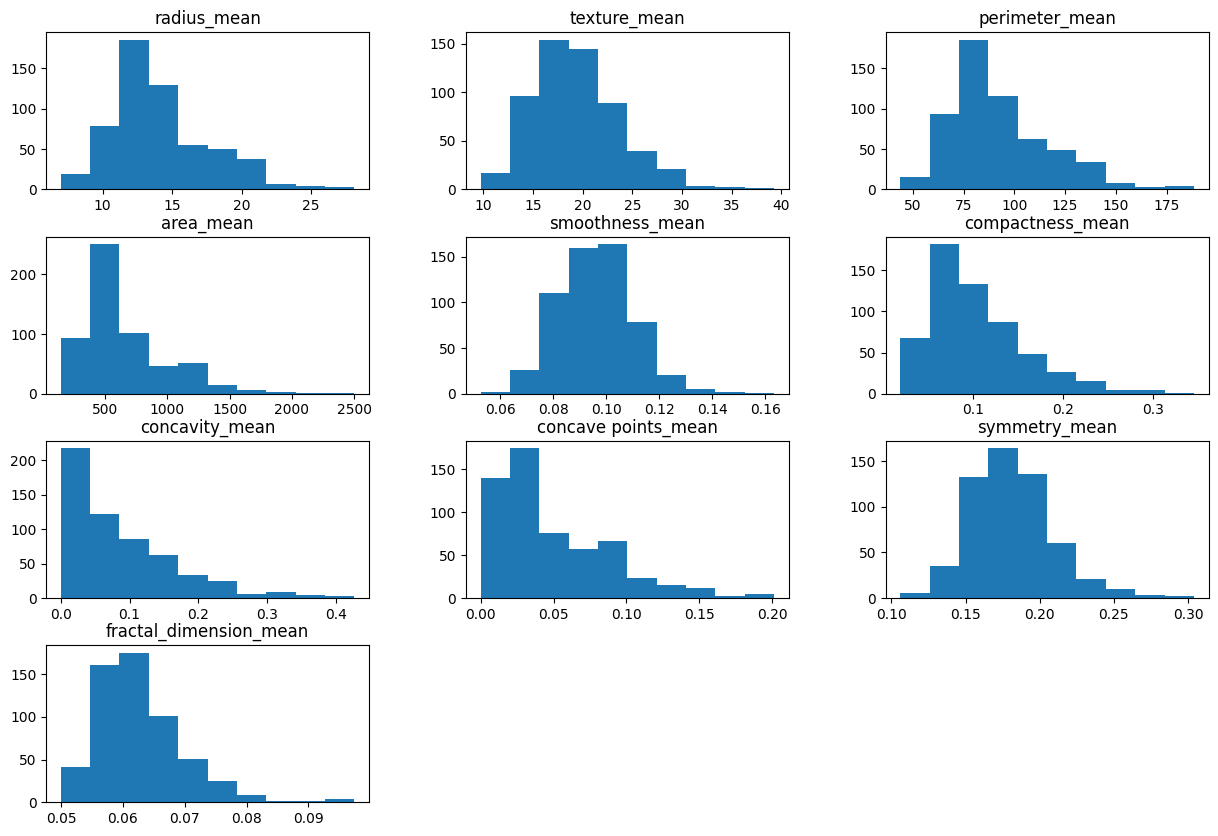

In [59]:
# Histogram for mean variables
hist_mean=dmean.hist(bins=10, figsize=(15, 10),grid=False,)

In [62]:
derror

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


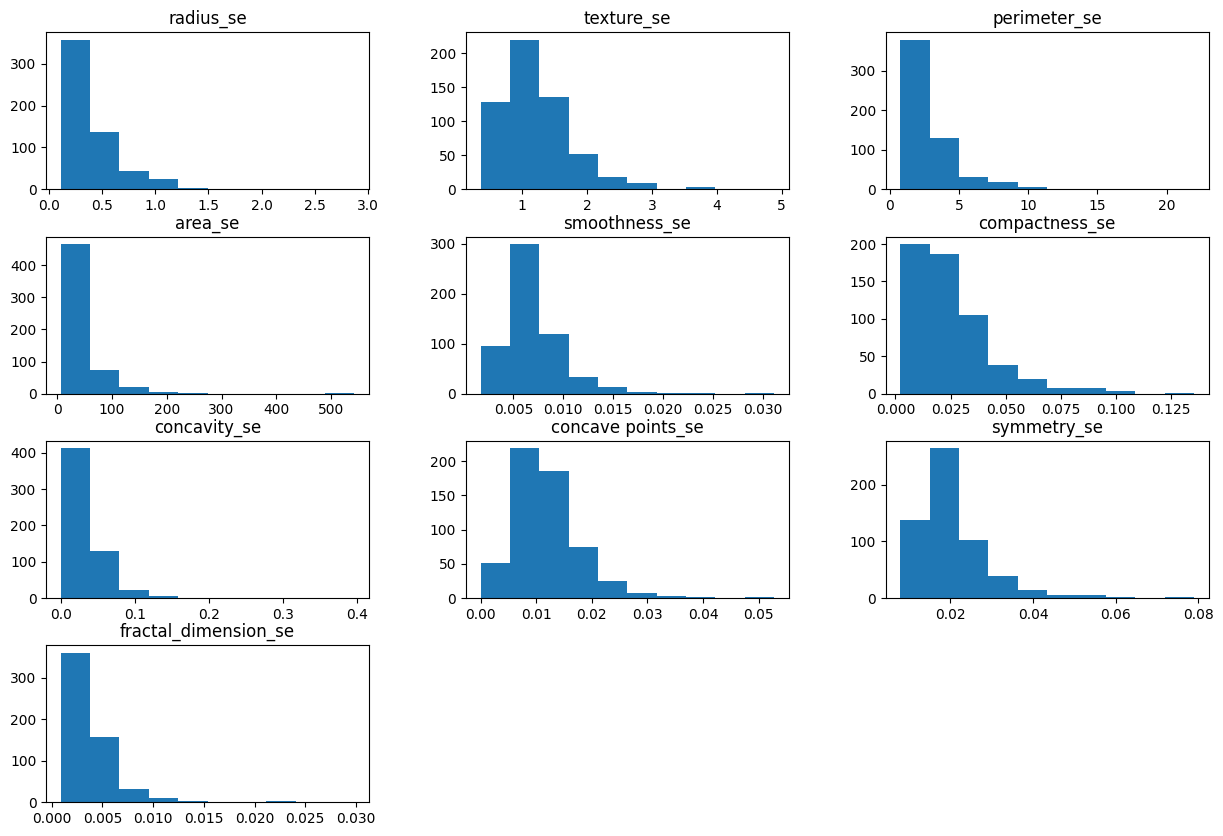

In [63]:
# Histogram for error variables
hist_mean=derror.hist(bins=10, figsize=(15, 10),grid=False,)

In [64]:
dworst

,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...
564,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


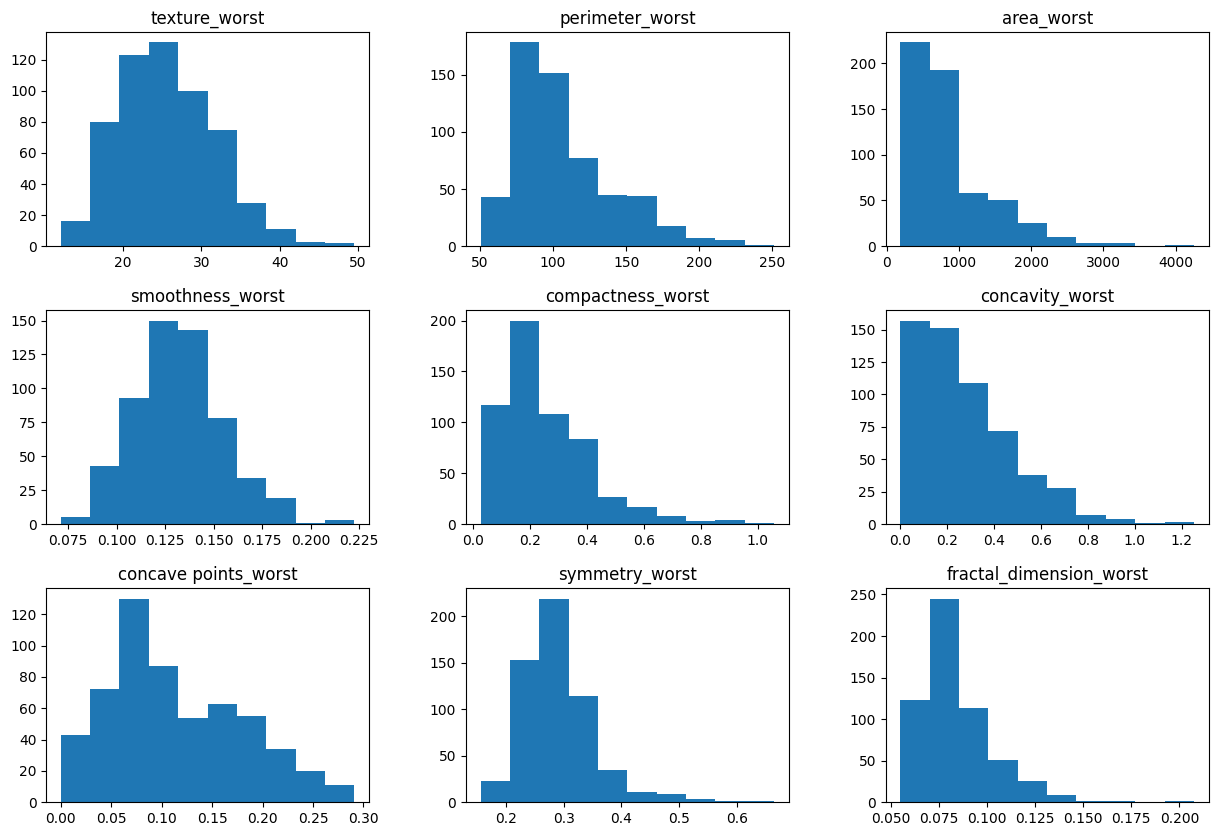

In [65]:
# Histogram for worst variables
hist_mean=dworst.hist(bins=10, figsize=(15, 10),grid=False,)

Observation:


> We can see that perhaps the attributes **concavity**,and **concavity_point** may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.



2.   Density Plots



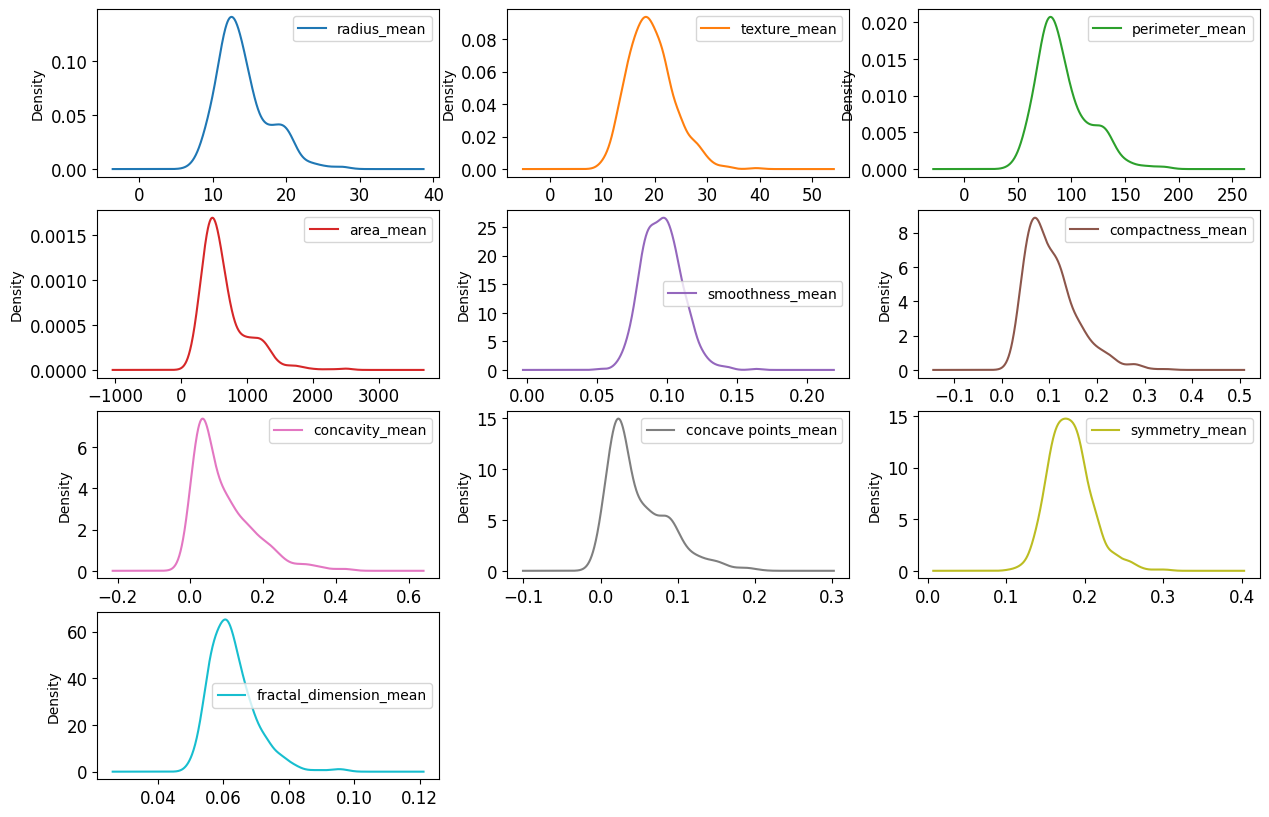

In [66]:
# Density plot for mean variables
plt = dmean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False,fontsize=12, figsize=(15,10))

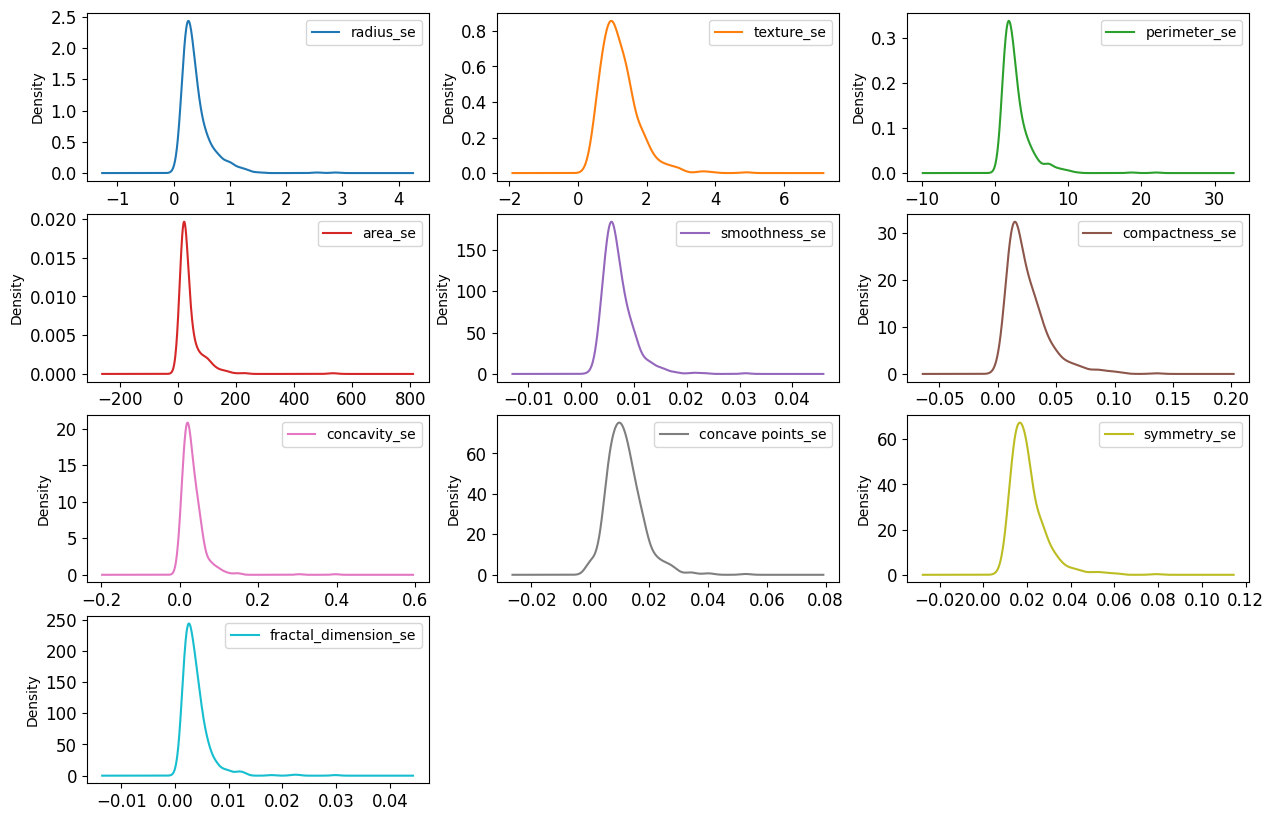

In [67]:
# Density plot for error variables
plt = derror.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False,fontsize=12, figsize=(15,10))

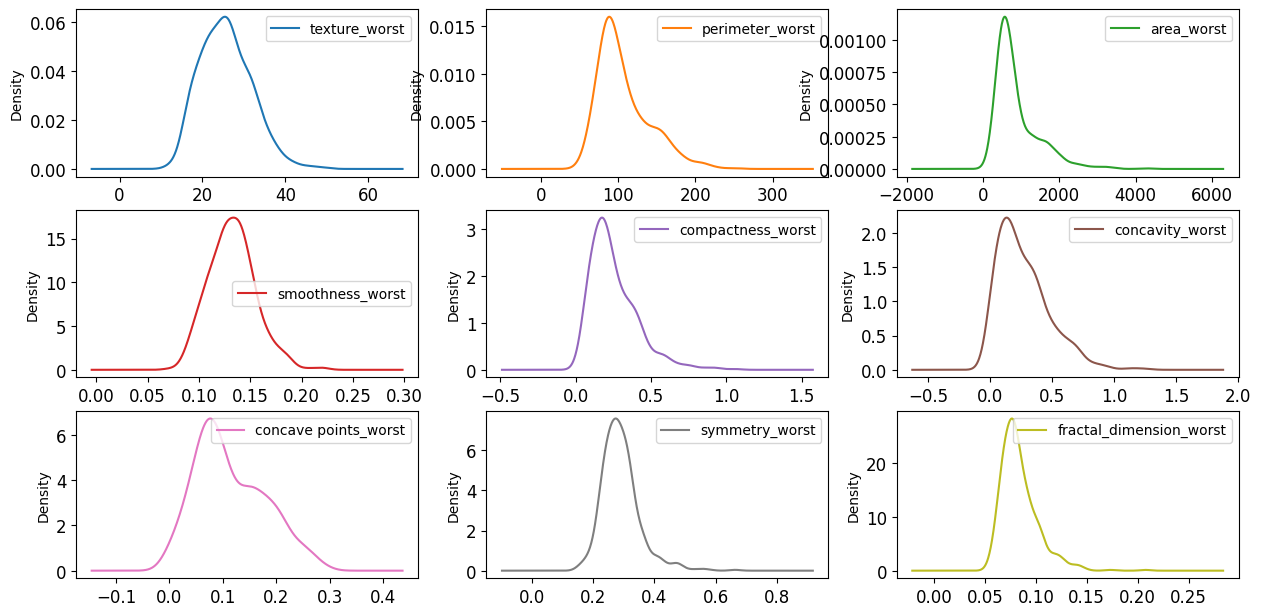

In [68]:
# Density plot for worst variables
plt = dworst.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False,fontsize=12, figsize=(15,10))

Observation:


> We can see that perhaps the attributes **perimeter,radius, area, concavity,ompactness** may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables



### Multimodal Data Visualizations
1. Correlation matrix
2. Scatter plots


---



1. Correlation matrix

<ipython-input-69-f195df6a1534>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


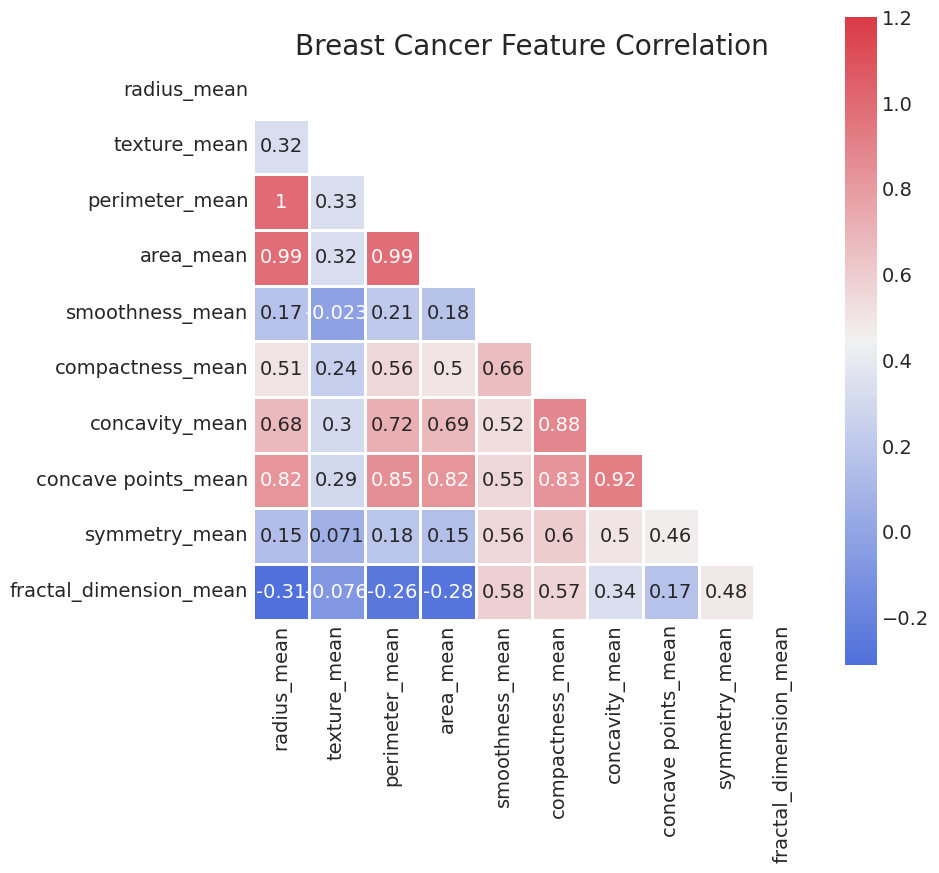

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = dmean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square=True, cmap=cmap, mask=mask,
            ax=ax, annot=True, fmt='.2g', linewidths=2)

plt.show()

Observation:
We can see strong positive relationship exists with mean values paramaters between 1-0.75;.

* The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter.
* Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc.
* Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.



2. Pairwise Relationships Visualization

Executing the `sns.pairplot` function on the Breast Cancer DataFrame (`df`) allows us to visually explore the pairwise relationships between selected features.

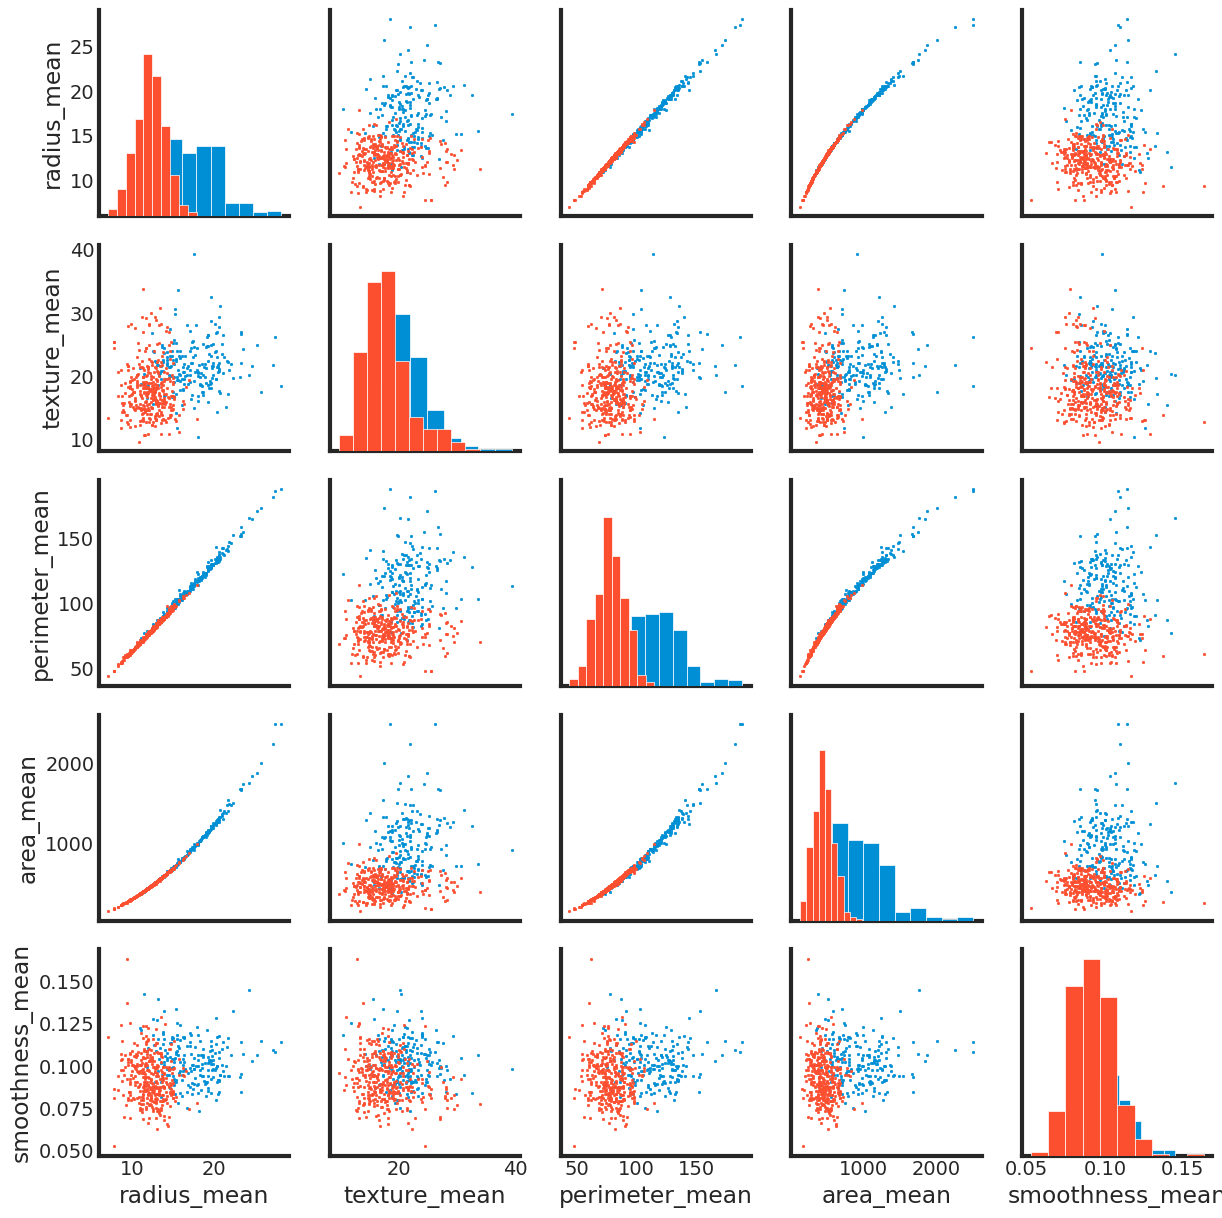

In [77]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df2 = pd.read_csv('/content/Cancer clean_data.csv', index_col=False)
g = sns.PairGrid(df2[[df2.columns[1],df2.columns[2],df2.columns[3],
                     df2.columns[4], df2.columns[5],df2.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

Summary:

* Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

* Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

* In any of the histograms there are no noticeable large outliers that warrants further cleanup.

###  Pre-Processing the data
Our goal is to find the most predictive features of the data and filter it so it will enhance the predictive power of the model.

1. Label encoding

Here, I assign the 30 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

In [78]:
#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31]
y = array[:,0]

In [79]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
#le.transform (['M', 'B'])

After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively, illustrated by calling the transform method of LabelEncorder on two dummy variables.

### Assesing Model Accuracy:
Split data into training and test sets

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will:

* Split the available data into a training set and a testing set. (70% training, 30% test)
* Train the algorithm on the first part,
* Make predictions on the second part and
evaluate the predictions against the expected results.

The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing

In [80]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

2. Feature Standardization

As seen in Histogram & Density plots, the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, I will use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one.

In [81]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

3. Feature decomposition using Principal Component Analysis( PCA)

From the pair plot above, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions.

In [82]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

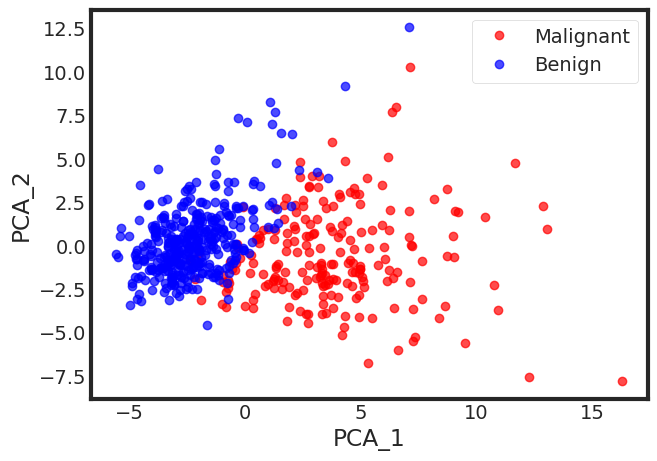

In [85]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.diagnosis == 'M'],PCA_df['PCA_2'][df.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 'B'],PCA_df['PCA_2'][df.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are “most spread” along the new feature axes.

### Dimension reduction using PCA

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. More about scree plot can be found [here](https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html), and [hear](https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/)

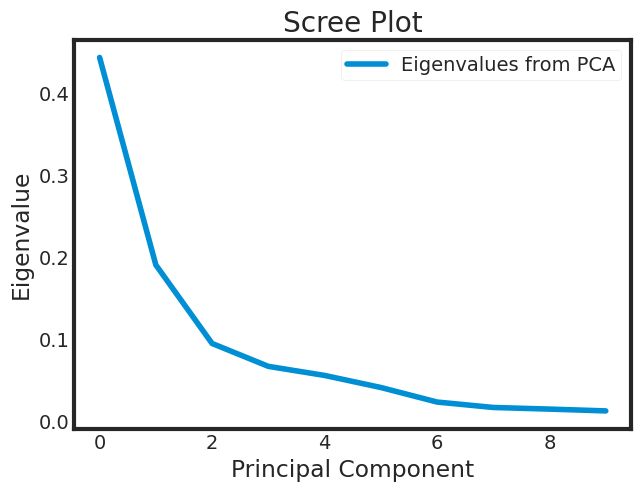

In [87]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

Observation:

The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

### Predictive model using Support Vector Machine (SVM)

 SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995)

### Important Parameters

The important parameters in kernel SVMs are:

* Regularization parameter C,
* The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
* Kernel-specific parameters.

Gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# visualization
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [90]:
# Dropping the unnamed column
df2.drop('Unnamed: 0',axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
#Assign predictors to a variable of ndarray (matrix) type
array = df2.values
X = array[:,1:31] # features
y = array[:,0]

In [93]:
#transform the class labels from their original string representation (M and B) into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

### Classification with cross-validation

As discussed splitting the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. Cross-validation extends this idea further. Instead of having a single train/test split, we specify **so-called folds** so that the data is divided into similarly-sized folds.

* Training occurs by taking all folds except one – referred to as the holdout sample.

* On the completion of the training, you test the performance of your fitted model using the holdout sample.

* The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample.

* Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample.

* The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample.

This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

In [95]:
# 1. Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# 2. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# 3. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.95



To get a better measure of prediction accuracy (which you can use as a proxy for “goodness of fit” of the model), you can successively split the data into folds that you will use for training and testing:

In [101]:
# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 10
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 10-fold cross-validation accuracy score for this classifier is 0.98



The above evaluations were based on using the entire set of features. We will now employ the correlation-based feature selection strategy to assess the effect of using 3 features which have the best correlation with the class labels.

In [134]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=10)

# Get average of 5-fold cross-validation score using an SVC estimator.
n_folds = 5
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 5-fold cross-validation accuracy score for this classifier is 0.97



In [135]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print ("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.96491228 0.87719298 0.92982456 0.94736842 0.94736842 0.98245614
 0.92982456 0.96491228 0.9122807  0.96428571]
Average score and uncertainty: (94.20 +- 0.928)%


From the above results, you can see that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features. Feature selection is an important part of the model-building process that you must always pay particular attention to. The details are beyond the scope of this notebook. In the rest of the analysis, you will continue using the entire set of features.

### Model Accuracy: Receiver Operating Characteristic (ROC) curve

In [136]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[106   1]
 [  6  58]]


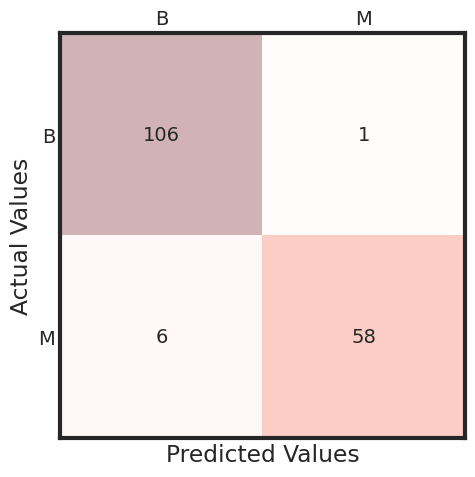

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [137]:
from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)

# Customize the tick labels
class_labels = ['B', 'M']
ax.set_xticks(range(len(class_labels)))
ax.set_yticks(range(len(class_labels)))
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Assuming you have y_test and y_pred for the classification report
print(classification_report(y_test, y_pred))


**In easy language:**

1. Class 0 (Benign Class):

* Precision: 94% - When the model predicts class 0, it is correct 94% of the time.
* Recall: 99% - Out of all actual class 0 instances, the model correctly identifies 99%.
* F1-Score: 96% - A balanced measure considering both precision and recall for class 0.
* Support: There are 107 instances of class 0 in the dataset.

2. Class 1 (Malignant Class):

* Precision: 98% - When the model predicts class 1, it is correct 98% of the time.
* Recall: 89% - Out of all actual class 1 instances, the model correctly identifies 89%.
* F1-Score: 93% - A balanced measure considering both precision and recall for class 1.
* Support: There are 64 instances of class 1 in the dataset.

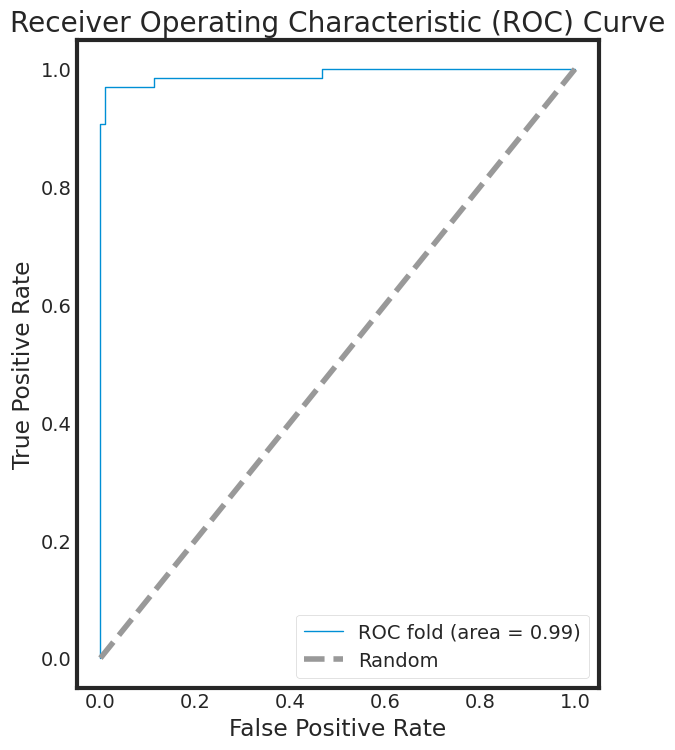

In [138]:
from sklearn.metrics import roc_curve, auc

# Assuming clf is your classifier and X_test, y_test are your test data
plt.figure(figsize=(6, 8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

* To interpret the ROC correctly, consider what the points that lie along the diagonal represent. For these situations, there is an equal chance of "+" and "-" happening. Therefore, this is not that different from making a prediction by tossing of an unbiased coin. Put simply,**the classification model is random.**

* For the points above the diagonal, tpr > fpr, and the model says that you are in a zone where you are performing better than random. For example, assume tpr = 0.99 and fpr = 0.01, Then, the probability of being in the true positive group is
(0.99/(0.99 + 0.01)) = 99%. Furthermore, holding fpr constant, it is easy to see that the more vertically above the diagonal you are positioned, the better the classification model.

### Optimizing the SVM Classifier

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. Now, I aim to tune parameters of the SVM Classification model using scikit-learn.

We can tune two key parameters of the SVM algorithm:

* the value of C (how much to relax the margin)
* the type of kernel.

Python scikit-learn provides two simple methods for algorithm parameter tuning:

* Grid Search Parameter Tuning.
* Random Search Parameter Tuning.

In [143]:
from sklearn.model_selection import GridSearchCV

# Train classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [144]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.98


In [145]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



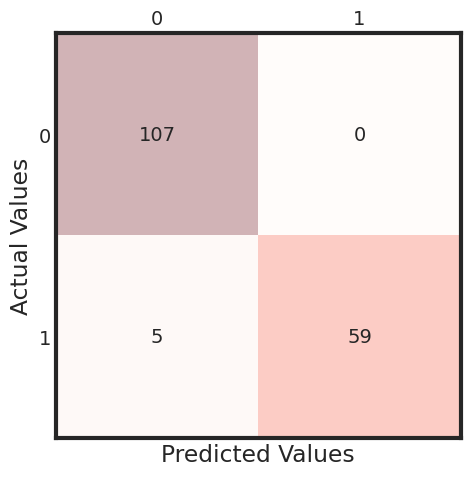

In [146]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

### Decision boundaries of different classifiers

The 3 classifiers:
* linear
* gaussian
* polynomial

In [147]:
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of SVM and fit out data.
# We do not scale ourdata since we want to plot the support vectors

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [148]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['axes.titlesize'] = 'large'

    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

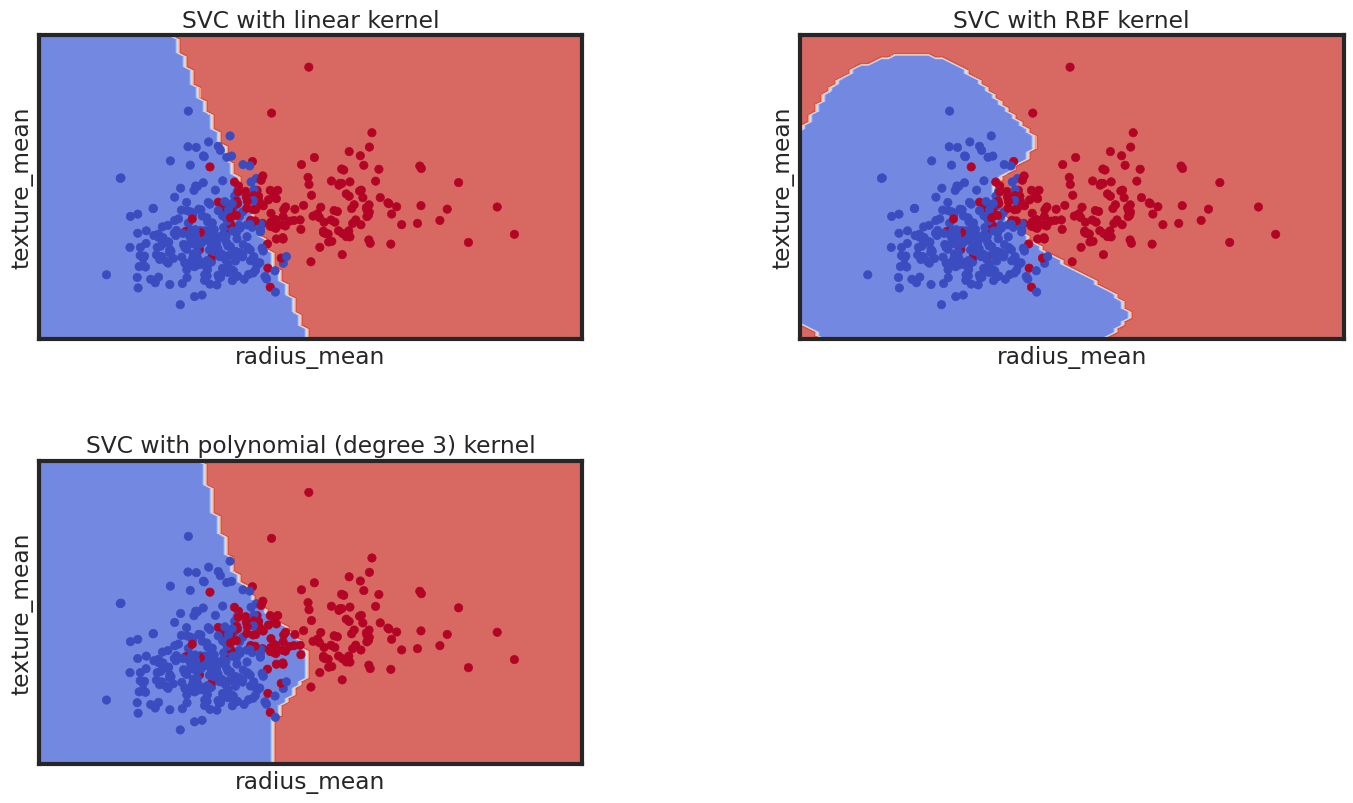

In [149]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Conclusion

Through the implementation of Support Vector Machines with different kernels, including RBF and Polynomial, we have successfully increased the average accuracy of breast cancer predictions from 96% to 98%. The visual representation of decision boundaries on the 'radius_mean' and 'texture_mean' features enhances interpretability, offering medical professionals valuable insights into the model's discriminatory capabilities. This improved accuracy holds the potential to positively impact clinical decision-making, supporting early and accurate breast cancer diagnoses.